In [1]:
import database

/var/wsgiapps/ehhapp-formulary2/views.py:3: ExtDeprecationWarning: Importing flask.ext.login is deprecated, use flask_login instead.
  import flask.ext.login as flask_login


In [2]:
test1 = MedicationRecord(
    id=111111,
    name="Acetaminophen",
    common_name="tylenol",
    transactions=[MedicationRecord.transaction(
        date=datetime.datetime(2017,12,4),
        price="3.78",
        qty=10)
        ],
    dosage="2x per 4 hours",
    admin="PO",
    category="debug",
    prescribable=False,
    aliases = None
    )
test2 = MedicationRecord(
    id=222222,
    name="Ibuprofen",
    common_name="Motrin",
    transactions=[MedicationRecord.transaction(
        date=datetime.datetime(2017,12,2),
        price="5.68",
        qty=24)
        ],
    dosage="2x per 8 hours",
    admin="PO",
    category="debug",
    prescribable=False,
    aliases = None
    )
test3 = MedicationRecord(
    id=333333,
    name="Acetylsalicylic acid",
    common_name="Aspirin",
    transactions=[MedicationRecord.transaction(
        date=datetime.datetime(2017,12,1),
        price="2.54",
        qty=20)
        ],
    dosage="once daily",
    admin="PO",
    category="important",
    prescribable=False,
    aliases = None
    )
test4 = MedicationRecord(
    id=333333,
    name="Acetylsalicylic acid",
    common_name="Aspirin",
    transactions=[MedicationRecord.transaction(
        date=datetime.datetime(2017,12,2),
        price="8.39",
        qty=90)
        ],
    dosage="once daily",
    admin="PO",
    category="important",
    prescribable=False,
    aliases = None
    )

In [4]:
database.save_persistent_record(test1)
database.save_persistent_record(test2)
database.save_persistent_record(test3)
database.save_persistent_record(test4)

<PersistentMedication 3>

In [6]:
database.get_all_medication_records()

[<MedicationRecord, id=111111, name=Acetaminophen, common_name=tylenol>,
 <MedicationRecord, id=222222, name=Ibuprofen, common_name=Motrin>,
 <MedicationRecord, id=333333, name=Acetylsalicylic acid, common_name=Aspirin>]

In [5]:
#!/usr/bin/env python
'''
Description: outputs desired quantity and cost data in .xlsx format
Inputs: persistant database with medicine list information
Output: excel file in desired format in .xlsx format
11/28/17 Brian Cho
'''

import pandas as pd
import invoicerecord
import database as medListDB

## Assume meds is list of MedicationRecord
medsList = medListDB.get_all_medication_records()	#import meds list from database

## Extract desired data in one loop from medsList
indexList = []
medInfoData = []
transactionHistoryData = []
for i in medsList:
	# Create list of index using id numbers from medsList
	# Will assume unique id nubmers to use as identifiers in database
	indexList.append(i.id)
	# Extract med info metadata
	medInfoData.append([i.name, i.category])
	# Extract transaction history data
	transactionHistoryData.append(i.transactions)

## Initialize dataframe for holding med info metadata
medInfoColumnsList = ["Name", "Category"]
medInfoDataFrame = pd.DataFrame(data = medInfoData, index = indexList, columns = medInfoColumnsList)

## Initialize dataframe for holding issue and cost data
# Use multi-indexing to generate issueCostDataFrame column names
issueCostColumns = [["Year", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ["Issue", "Cost"]]
issueCostColumnsList = pd.MultiIndex.from_product(issueCostColumns)
# Initialize dataframe containing 0's
issueCostDataFrame = pd.DataFrame(data = [[0]*len(issueCostColumns[0])*len(issueCostColumns[1]) for _ in range(len(indexList))], index = indexList, columns = issueCostColumnsList)

# Populate issueCostDataFrame
for transactionsIndex in range(len(transactionHistoryData)):
	if len(transactionHistoryData[transactionsIndex]) > 0:
		# Extract month, quantity, and cost information
		totalIssue = 0
		totalCost = 0
		for transaction in transactionHistoryData[transactionsIndex]:
			# Question: Is transactions going to be pre-processed to bucket by months?
			# Will assume transactions are bucketed by months for now
			issueCostDataFrame.loc[transactionsIndex, issueCostColumns[0][transaction.date.month]] = [transaction.qty, transaction.qty*transaction.price]
			totalIssue += transaction.qty
			totalCost += transaction.qty*transaction.price
		issueCostDataFrame.loc[transactionsIndex, "Year"] = [totalIssue, totalCost]
	else:
		pass
		# Should be pre-populated with 0's

# Output dataframes into desired format
# Can't seem to get rid of the extra line in the header for some reason
writer = pd.ExcelWriter("internalFormularyCosts.xlsx")
issueCostDataFrame.to_excel(writer, startcol=len(medInfoColumnsList))
medInfoDataFrame.to_excel(writer, startrow=2)
writer.save()

ValueError: cannot reindex from a duplicate axis

## How to view a graph of medication price over time

In [9]:
%matplotlib inline
import database
import pandas as pd
import matplotlib.pyplot as plt
import datetime

meds = database.get_all_medication_records()

In [15]:
df

,price,qty
date,,
2016-01-04 14:55:23,0.0935,60
2016-01-13 15:02:37,0.0935,60
2016-01-14 11:03:34,0.0935,60
2016-01-22 11:05:27,0.0935,60
2016-02-04 12:06:29,0.0935,60
2016-02-09 12:01:22,0.0935,60
2016-02-19 11:16:45,0.0935,60
2016-03-23 11:33:39,0.0239,60
2016-04-01 10:36:52,0.0239,60


In [37]:
df

,price,qty
date,,
2016-01-04 14:55:23,0.0935,60
2016-01-13 15:02:37,0.0935,60
2016-01-14 11:03:34,0.0935,60
2016-01-22 11:05:27,0.0935,60
2016-02-04 12:06:29,0.0935,60
2016-02-09 12:01:22,0.0935,60
2016-02-19 11:16:45,0.0935,60
2016-03-23 11:33:39,0.0239,60
2016-04-01 10:36:52,0.0239,60


In [57]:
cvs

date
2016-02-05 10:19:21                                               0.0356
2016-04-11 12:47:30                                               0.0386
2016-07-07 12:20:06                                               0.0726
2016-07-26 15:25:42                                               0.0726
2016-07-26 15:25:43                                               0.0726
2016-08-02 11:35:43                                               0.0726
2016-08-19 14:11:55                                               0.0726
2016-08-24 11:15:01                                               0.0726
2016-08-24 11:15:01                                               0.0726
2016-09-07 15:55:06                                               0.0726
2016-09-13 12:46:58                                               0.0726
2016-09-16 12:55:16                                               0.0726
2016-10-11 08:37:04                                               0.0726
2016-10-13 15:03:52                           

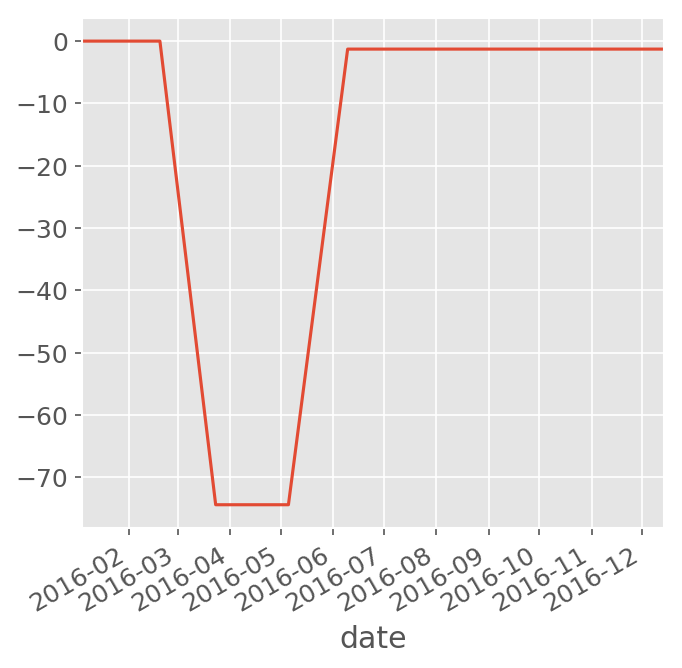

In [76]:
cvs = df[["price"]]
cvs["pct_change"] = [((cvs.iloc[i][0] - cvs.iloc[0][0]) / cvs.iloc[0][0] * 100) for i in range(0,len(cvs))]
cvs["pct_change"].plot()

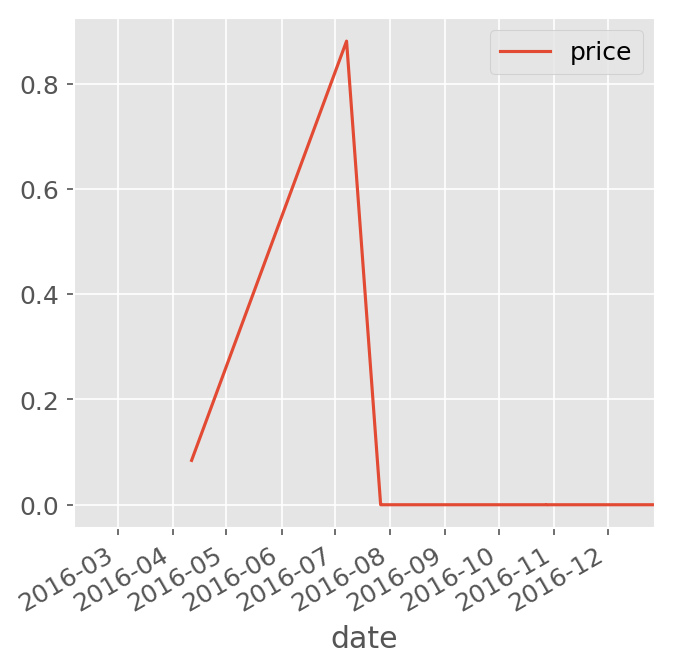

In [69]:
from matplotlib import rcParams
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')
rcParams['figure.figsize'] = (5,5)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 12
rcParams['font.family'] = 'DejaVu Sans'

df[["price"]].pct_change(periods=1, fill_method='pad').plot()

In [87]:
df[["price"]].resample('M').mean()

,price
date,
2016-01-31,0.0935
2016-02-29,0.0935
2016-03-31,0.0239
2016-04-30,0.0239
2016-05-31,0.0239
2016-06-30,0.0923
2016-07-31,0.0923
2016-08-31,0.0923
2016-09-30,0.0923


In [119]:
df[["price"]].resample('MS').first().loc[idx,].fillna(method='ffill')

,price
2016-01-01,0.6605
2016-02-01,0.6605
2016-03-01,6.7320
2016-04-01,0.6281
2016-05-01,0.6281
2016-06-01,0.6281
2016-07-01,0.6281
2016-08-01,0.6281
2016-09-01,0.6281
2016-10-01,0.6281


In [104]:
df.loc[idx,]

KeyError: "None of [DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',\n               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],\n              dtype='datetime64[ns]', freq='MS')] are in the [index]"

In [132]:
meds_to_chart = ["glimepiride 2MG",
                "buproprion XL 300MG",
                "warfarin 10MG",
                "digoxin 0.125MG",
                "insulin glargine",
                "norgestim",
                "metformin",
                "ketoconazole",
                "insulin lispro"]

idx = pd.date_range('2016-01-01 00:00:00', freq='MS', periods=12)
price_df = pd.DataFrame(index=idx)
#print(idx)
for med in meds:
    for names in meds_to_chart:
        if names.upper() in med.name:
            df = pd.DataFrame([{"date":t.date,"price":t.price,"qty":t.qty} for t in med.transactions if (t.date.year==2016)&(t.qty>0)])
            if len(df)>0:
                df.set_index("date",inplace=True)
                prices = df[["price"]].resample('MS').mean().loc[idx,].fillna(method='ffill').fillna(method='bfill')
                price_df[med.name] = prices
                print(med.name)
                prices.plot(title=med.name)
                plt.ylabel("average price")
                plt.show()
                pct_change_per_mo = prices.pct_change(periods=1, fill_method='pad').fillna(0)
                pct_change_per_mo = pct_change_per_mo*100
                pct_change_per_mo.plot(title=med.name)
                plt.ylabel("% change per month")
                plt.show()
                cvs = prices
                cvs["pct_change"] = [((cvs.iloc[i][0] - cvs.iloc[0][0]) / cvs.iloc[0][0] * 100) for i in range(0,len(cvs))]
                cvs["pct_change"].plot(title=med.name)
                plt.ylabel("Cumulative % change")
                plt.show()

DIGOXIN 0.125MG TAB
INSULIN GLARGINE 10 ML
INSULIN LISPRO 100 UNITS/ML 10ML OPD ONLY
METFORMIN 1000MG TAB 500
METFORMIN 500MG TAB
METFORMIN 850MG TAB
NORGESTIMATE/ETHINYL ESTRADIOL
WARFARIN 10MG TAB UD
GLIMEPIRIDE 2MG TABLET
KETOCONAZOLE 2% CREAM 30G
METFORMIN HCL TAB ER 24HR 500 MG
NORGESTIM/ETHINYL ESTRAD LO


In [8]:
meds = medications
idx = pd.date_range('2017-01-01 00:00:00', freq='MS', periods=12)
price_df = pd.DataFrame(index=idx)
#print(idx)
for med in meds:
    df = pd.DataFrame([{"date":t.date,"price":t.price,"qty":t.qty} for t in med.transactions if (t.date.year==2017)])
    if len(df)>0:
        df.set_index("date",inplace=True)
        prices = df[["price"]].resample('MS').mean().loc[idx,].fillna(method='ffill').fillna(method='bfill')
        price_df[med.name[0:30]] = prices
len(price_df.columns)

271

In [54]:
subtype

Timestamp('2017-12-01 00:00:00', freq='MS')

0.00801736660895


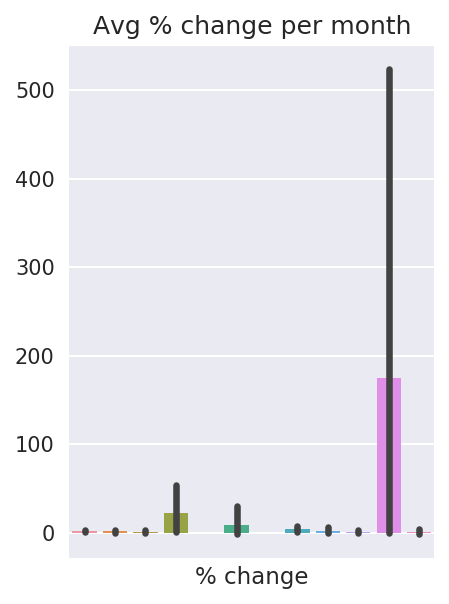

In [74]:
from scipy import stats

plt.style.use('seaborn')
scale = 1
rcParams['figure.figsize'] = (8,8)
rcParams['figure.dpi'] = 150
rcParams["legend.labelspacing"]=0
rcParams["legend.columnspacing"] = 0
rcParams["legend.shadow"] = False
rcParams["legend.frameon"] = False
rcParams["legend.borderpad"] = 0
sb.set(font_scale=1)
g = sb.factorplot(data=price_df.pct_change().bfill().T*100,kind="bar")

x = []
for subtype,group in price_df.pct_change().bfill().iterrows():
    x.append(list(group.values))

obj = stats.kruskal(x[0],x[1],x[2],x[3],x[4],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11])
print(obj.pvalue)
plt.setp(g.ax.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax.get_xticklabels(), rotation=90) # For x axis
g.ax.set_title("Avg % change per month")
g.ax.set_ylabel("month")
g.ax.set_xticks([])
plt.show()

In [67]:
a.set_label("d")
a.get_label()

'd'

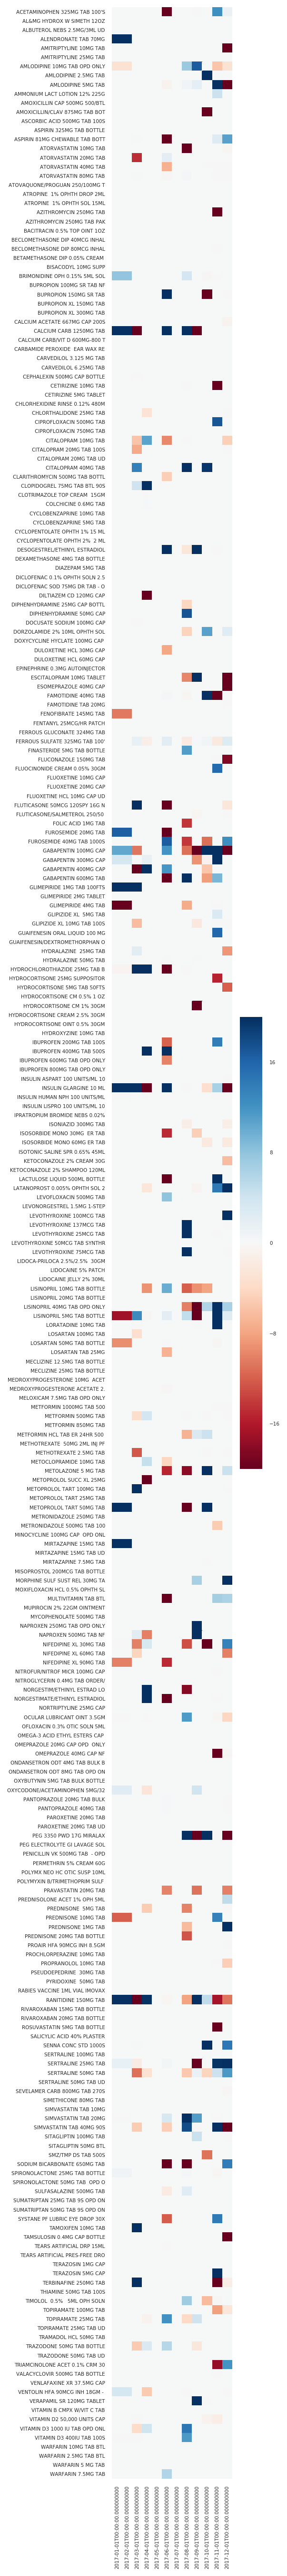

In [18]:
import seaborn as sb
from matplotlib import rcParams
plt.style.use('seaborn')
scale = 1
rcParams['figure.figsize'] = (4*scale,36*scale)
rcParams['figure.dpi'] = 150
rcParams["legend.labelspacing"]=0
rcParams["legend.columnspacing"] = 0
rcParams["legend.shadow"] = False
rcParams["legend.frameon"] = False
rcParams["legend.borderpad"] = 0
sb.set(font_scale=0.5)
sb.heatmap(price_df.pct_change().bfill().T*100,vmin=-20, vmax=20,cmap="RdBu")
plt.tight_layout()
plt.savefig("heatmap_prices_2017.pdf",pad_inches=3)

In [170]:
import seaborn as sb
import numpy as np
from random import shuffle

In [174]:
colors = plt.cm.Accent(np.linspace(0, 1, len(price_df)))
colors = shuffle(colors)

In [202]:
prices = price_df.copy(deep=True)
prices

,DIGOXIN 0.125MG TAB,INSULIN GLARGINE 10 ML,INSULIN LISPRO 100 UNITS/ML 10ML OPD ONLY,METFORMIN 1000MG TAB 500,METFORMIN 500MG TAB,METFORMIN 850MG TAB,NORGESTIMATE/ETHINYL ESTRADIOL,WARFARIN 10MG TAB UD,GLIMEPIRIDE 2MG TABLET,KETOCONAZOLE 2% CREAM 30G,METFORMIN HCL TAB ER 24HR 500 MG,NORGESTIM/ETHINYL ESTRAD LO
2016-01-01,0.6605,93.7200,44.95,0.0935,0.046700,0.02830,0.271200,2.4833,0.152500,65.70,0.0356,0.2639
2016-02-01,0.6605,92.9400,44.95,0.0935,0.049400,0.02830,0.270100,2.4833,0.152500,65.70,0.0356,0.2639
2016-03-01,6.7320,92.9400,44.95,0.0239,0.049400,0.02830,0.270100,2.4833,0.152500,65.70,0.0356,0.2639
2016-04-01,0.6281,92.9400,46.14,0.0239,0.049400,0.02830,0.270100,2.4833,0.152500,65.70,0.0386,0.2639
2016-05-01,0.6281,148.6260,46.14,0.0239,0.049276,0.02825,0.268900,2.4833,0.152267,65.70,0.0386,0.2627
2016-06-01,0.6281,92.5300,220.60,0.0923,0.038829,0.02825,0.268900,2.6916,0.151800,29.26,0.0386,0.2627
2016-07-01,0.6281,231.3200,220.60,0.0923,0.049200,0.02960,0.283000,2.6916,0.151800,29.26,0.0726,0.2627
2016-08-01,0.6281,231.2975,237.15,0.0923,0.049200,0.02960,0.282900,0.0522,0.033300,29.29,0.0726,0.2627
2016-09-01,0.6281,231.2900,237.15,0.0923,0.055050,0.02960,0.282900,0.0522,0.033300,29.29,0.0726,0.2627
2016-10-01,0.6281,231.2900,237.15,0.0923,0.041409,0.02960,0.275433,0.0522,0.033300,29.12,0.0726,0.2627


In [203]:
prices.iloc[0][1]

93.719999999999999

/home/rneff/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


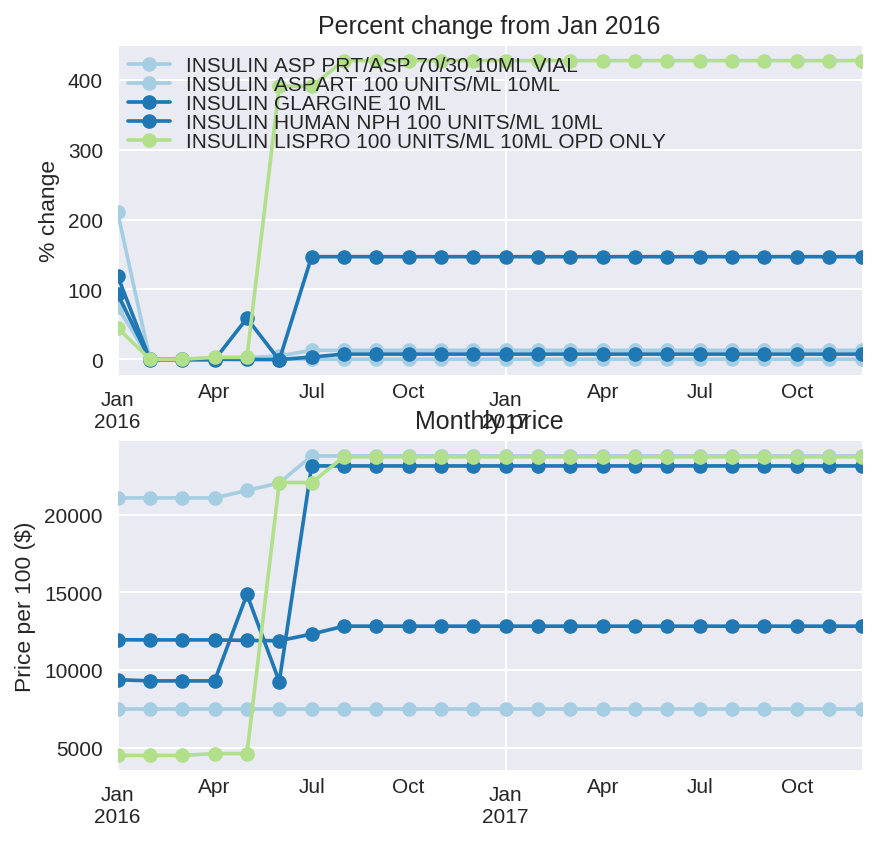

In [43]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import database
import pandas as pd
import mpld3
mpld3.enable_notebook()
#colors = shuffle(colors)

#pd.set_option('display.width', 100)
#pd.set_option('display.max_columns', 100)
plt.style.use('seaborn')
scale = .4
rcParams['figure.figsize'] = (16*scale,8*scale)
rcParams['figure.dpi'] = 150
rcParams["legend.labelspacing"]=0
rcParams["legend.columnspacing"] = 0
rcParams["legend.shadow"] = False
rcParams["legend.frameon"] = False
rcParams["legend.borderpad"] = 0
#rcParams['font.size'] = 12
#rcParams['font.family'] = 'DejaVu Sans'
#plt.style.use('seaborn-bright')

search_term = "insulin"

if search_term:
		meds = []
		if ";" in search_term:
			search_terms = search_term.split(";")
			search_terms = [i.strip().upper() for i in search_terms]
			for m in search_terms:
				med_result = database.PersistentMedication.query.filter(database.PersistentMedication.name.contains(m)).all()
				med_result = [i.to_class() for i in med_result]
				meds.extend(med_result)
		else:
			med_to_chart = search_term.upper()
			meds = database.PersistentMedication.query.filter(database.PersistentMedication.name.contains(med_to_chart)).all()
			meds = [i.to_class() for i in meds]
		idx = pd.date_range('2016-01-01 00:00:00', freq='MS', periods=24)
		price_df = pd.DataFrame(index=idx)
		#print(idx)
		for med in meds:
		    df = pd.DataFrame([{"date":t.date,"price":t.price,"qty":t.qty} for t in med.transactions if (t.date.year==2016)&(t.qty>0)])
		    if len(df)>0:
		        df.set_index("date",inplace=True)
		        prices = df[["price"]].resample('MS').mean().loc[idx,].fillna(method='ffill').fillna(method='bfill')
		        price_df[med.name] = prices

		prices = price_df.copy(deep=True)

		fig, (ax1,ax2) = plt.subplots(1,2)
		colors = plt.cm.Paired(np.linspace(0, 1, len(price_df)))

		for col in range(0,len(prices.columns)):
		    for row in range(1,len(prices.index)):
		        prices.iloc[row][col] = ((prices.iloc[row][col] - prices.iloc[0][col]) / prices.iloc[0][col]) * 100
		prices.plot(marker="o",title="Percent change from Jan 2016",colors=colors,ax=ax1)
		ax1.set_ylabel("% change")
		leg = ax1.get_legend()

		price_df_100 = price_df.copy(deep=True)*100
		price_df_100.plot(marker="o",title="Monthly price",colors=colors,ax=ax2)
		ax2.set_ylabel("Price per 100 ($)")
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import database
import pandas as pd
import mpld3
mpld3.enable_notebook()
#colors = shuffle(colors)

#pd.set_option('display.width', 100)
#pd.set_option('display.max_columns', 100)
plt.style.use('seaborn')
scale = .4
rcParams['figure.figsize'] = (16*scale,16*scale)
rcParams['figure.dpi'] = 150
rcParams["legend.labelspacing"]=0
rcParams["legend.columnspacing"] = 0
rcParams["legend.shadow"] = False
rcParams["legend.frameon"] = False
rcParams["legend.borderpad"] = 0
#rcParams['font.size'] = 12
#rcParams['font.family'] = 'DejaVu Sans'
#plt.style.use('seaborn-bright')

search_term = "insulin"

if search_term:
		meds = []
		if ";" in search_term:
			search_terms = search_term.split(";")
			search_terms = [i.strip().upper() for i in search_terms]
			for m in search_terms:
				med_result = database.PersistentMedication.query.filter(database.PersistentMedication.name.contains(m)).all()
				med_result = [i.to_class() for i in med_result]
				meds.extend(med_result)
		else:
			med_to_chart = search_term.upper()
			meds = database.PersistentMedication.query.filter(database.PersistentMedication.name.contains(med_to_chart)).all()
			meds = [i.to_class() for i in meds]
		idx = pd.date_range('2016-01-01 00:00:00', freq='MS', periods=24)
		price_df = pd.DataFrame(index=idx)
		#print(idx)
		for med in meds:
		    df = pd.DataFrame([{"date":t.date,"price":t.price,"qty":t.qty} for t in med.transactions if (t.date.year==2016)&(t.qty>0)])
		    if len(df)>0:
		        df.set_index("date",inplace=True)
		        prices = df[["price"]].resample('MS').mean().loc[idx,].fillna(method='ffill').fillna(method='bfill')
		        price_df[med.name] = prices

		prices = price_df.copy(deep=True)

		fig, (ax1,ax2) = plt.subplots(2,1)
		colors = plt.cm.Paired(np.linspace(0, 1, len(price_df)))

		for col in range(0,len(prices.columns)):
		    for row in range(1,len(prices.index)):
		        prices.iloc[row][col] = ((prices.iloc[row][col] - prices.iloc[0][col]) / prices.iloc[0][col]) * 100
		prices.plot(marker="o",title="Percent change from Jan 2016",colors=colors,ax=ax1)
		ax1.set_ylabel("% change")
		ax1.legend(fontsize = 10,shadow=False,framealpha=0,loc="upper left",)

		price_df_100 = price_df.copy(deep=True)*100
		price_df_100.plot(marker="o",title="Monthly price",colors=colors,ax=ax2)
		ax2.set_ylabel("Price per 100 ($)")
		ax2.legend(fontsize = 10,shadow=False,framealpha=0,loc="upper left")


In [23]:
len(medications)

271

In [1]:
%matplotlib inline
import database
import pandas as pd
import matplotlib.pyplot as plt

meds = database.get_all_medication_records()
year="2017"
medications = database.PersistentMedication.query.\
    order_by(database.PersistentMedication.name.asc()).\
    all()
medications = [i.to_class() for i in medications]
if year!="0":
    medout = []
    for m in medications:
        m.transactions = [t for t in m.transactions if t.date.year==int(year)]
        if len(m.transactions)!=0:
            medout.append(m)
medications = medout

/var/wsgiapps/ehhapp-formulary2/views.py:3: ExtDeprecationWarning: Importing flask.ext.login is deprecated, use flask_login instead.
  import flask.ext.login as flask_login
/var/wsgiapps/ehhapp-formulary2/views.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/rneff/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/rneff/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/rneff/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/rneff/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, i

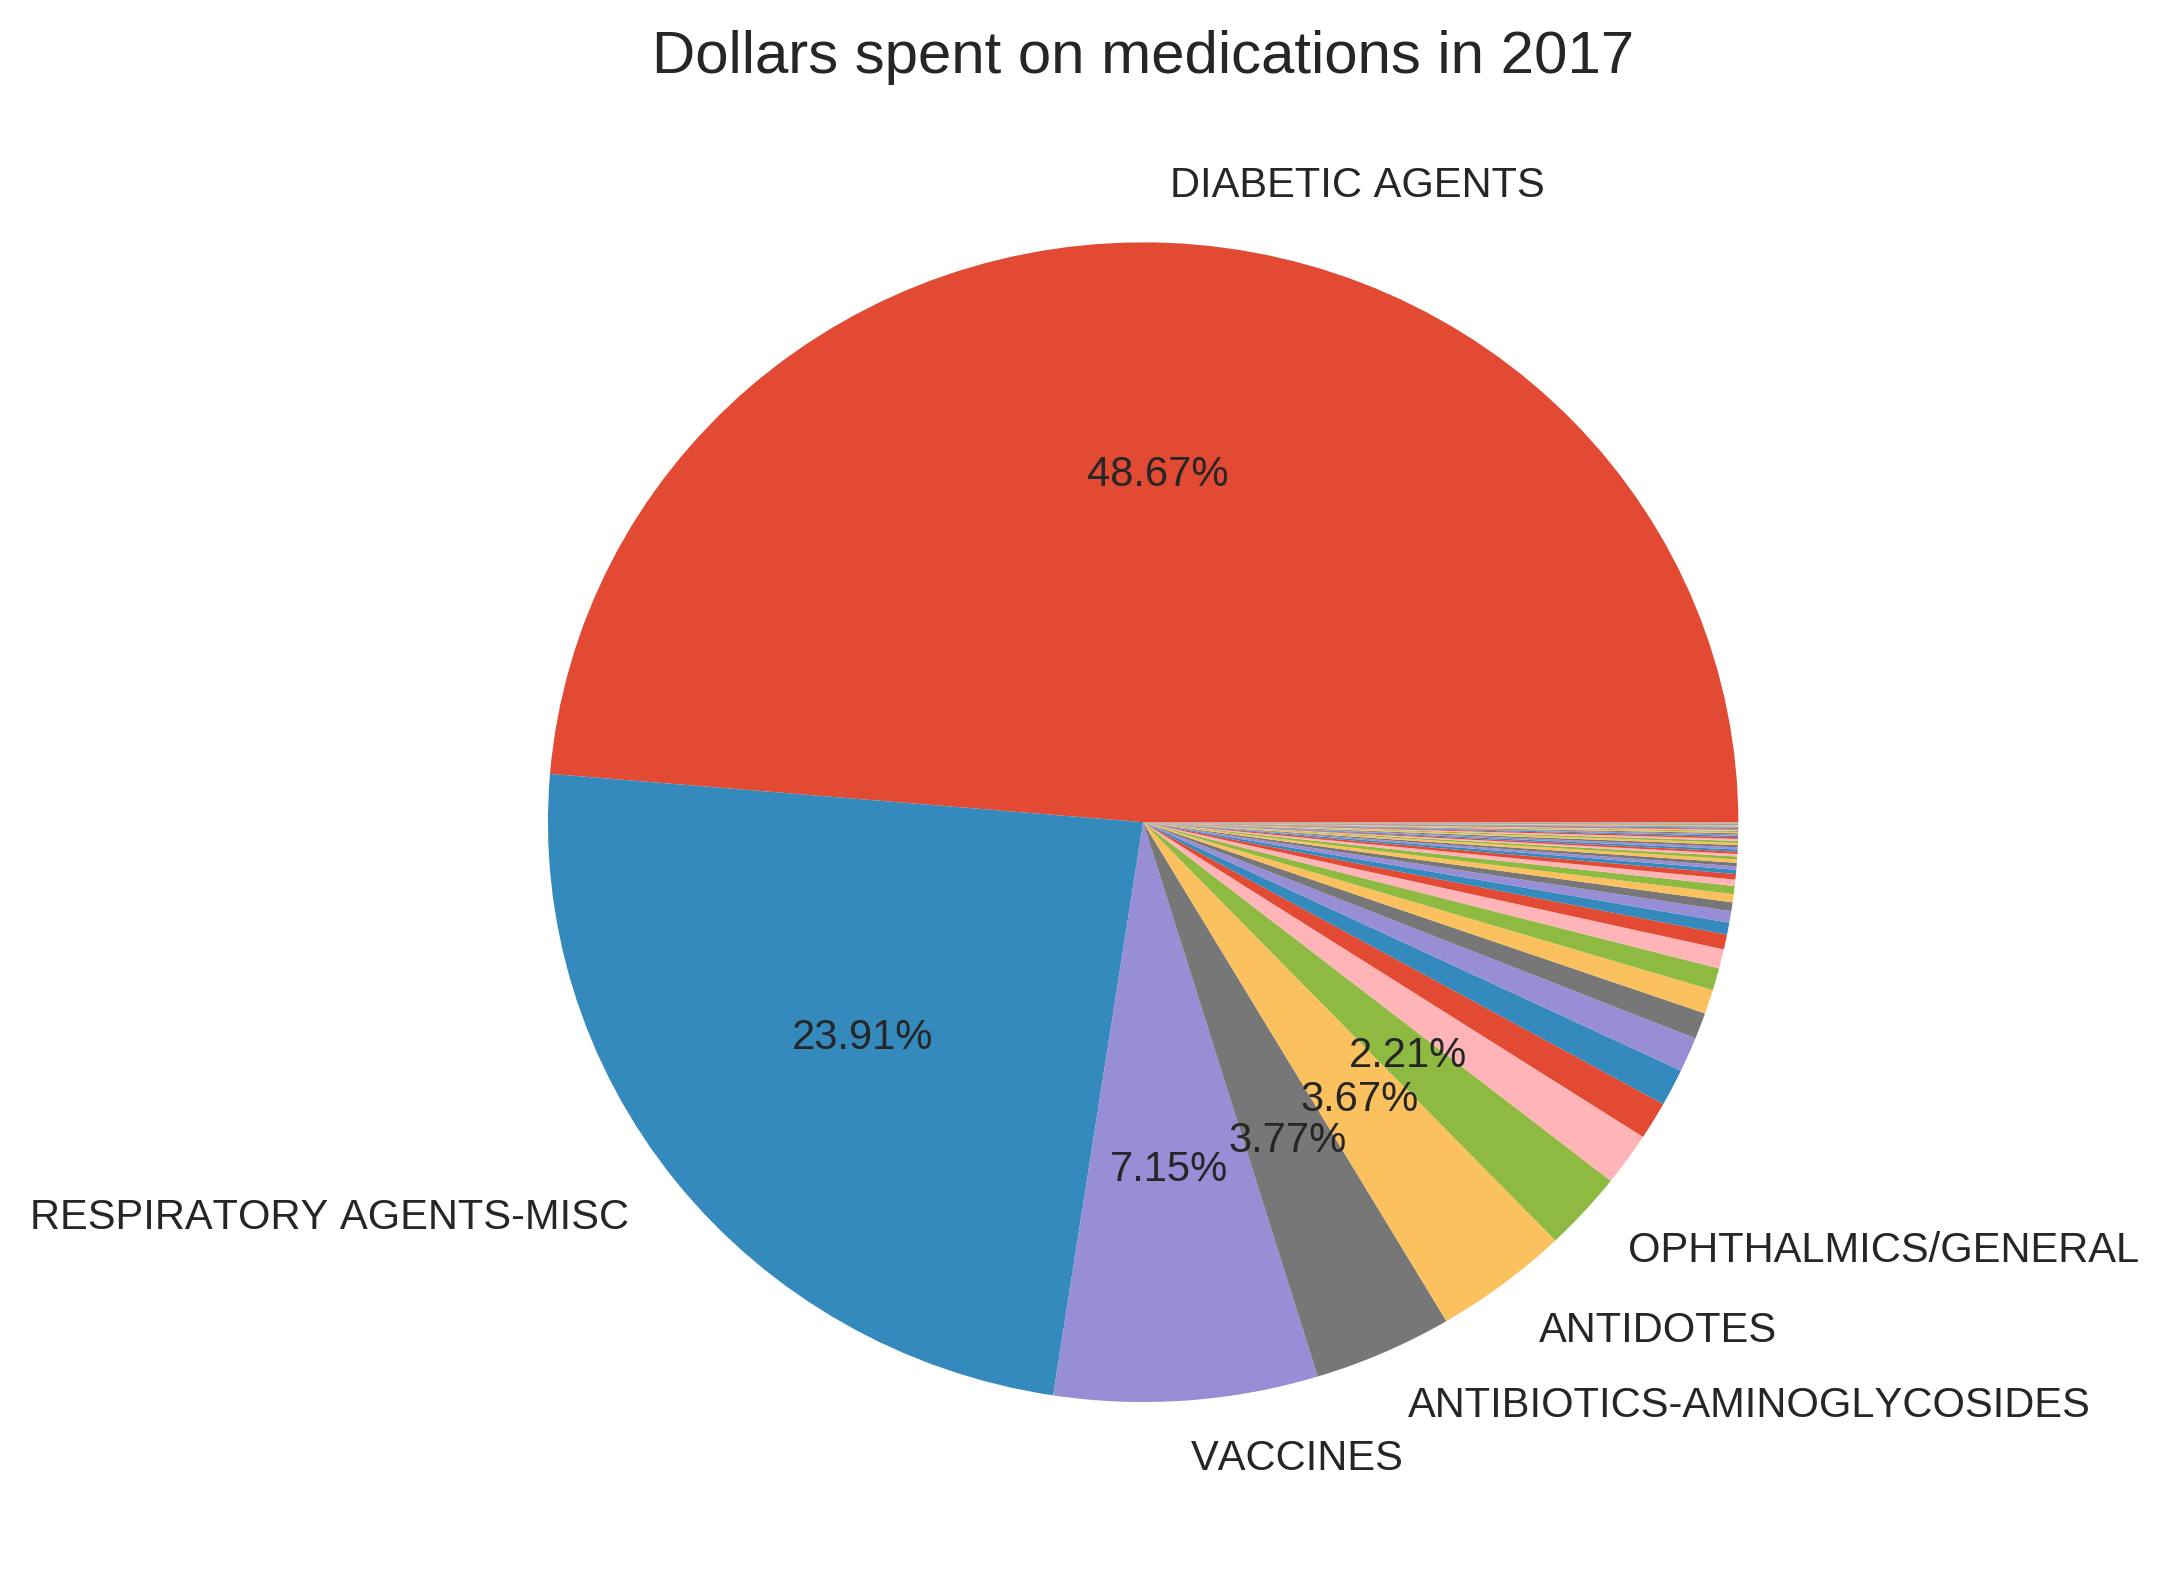

In [59]:
from matplotlib import rcParams
plt.style.use('ggplot')
scale = 0.8
rcParams['figure.figsize'] = (8*scale,8*scale)
rcParams['figure.dpi'] = 300
rcParams["legend.labelspacing"]=0
rcParams["legend.columnspacing"] = 0
rcParams["legend.shadow"] = False
rcParams["legend.frameon"] = False
rcParams["legend.borderpad"] = 0

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 1.5 else ''

med_df = pd.DataFrame([{"name":m.name,
                        "category":m.category.split(" - ")[0].split(",")[0].strip() if m.category!=None else "Other",
                        "price_spent":sum([t.price for t in m.transactions])} for m in medications])
data = med_df.pivot_table(index="category",values="price_spent").\
sort_values("price_spent",ascending=False)["price_spent"]

labels = [n if v > data.sum() * 0.015 else '' for n, v in zip(data.index, data)]

fig = data.plot.pie(y="price_spent",autopct=my_autopct,labels=labels,title="Dollars spent on medications in 2017",label="")
plt.legend([])
plt.show()

In [ ]:
from matplotlib import rcParams
plt.style.use('ggplot')
scale = 0.8
rcParams['figure.figsize'] = (8*scale,8*scale)
rcParams['figure.dpi'] = 300
rcParams["legend.labelspacing"]=0
rcParams["legend.columnspacing"] = 0
rcParams["legend.shadow"] = False
rcParams["legend.frameon"] = False
rcParams["legend.borderpad"] = 0



In [2]:
#!/usr/bin/env python
'''
Description: reads EHHOP formularly invoice in .xls format
Inputs: EHHOP formularly invoice in .xls standard format
Output: Consolidated formulary invoice record with summed issues in .csv format

11/20/2017 Daniel Charytonowicz
'''
import os, collections, invoicerecord, csv, database, numpy
from datetime import datetime
import collections
import invoicerecord
from invoicerecord import MedicationRecord
import database
import pandas as pd
import datetime

actualcolumns= ["Exp Code",
                "Supply Loc",
                "Item No",
                "Item Description",
                "Vendor Name",
                "Vendor Ctlg No",
                "Mfr Name",
                "Mfr Ctlg No",
                "Comdty Name ",
                "Comdty Code",
                "Requisition No",
                "Requisition Date",
                "Issue Qty",
                "UM",
                "Price",
                "Extended Price",
                "Cost Center No"]

invoice_columns = ['exp_code',
                 'supply_loc',
                 'item_no',
                 'item_description',
                 'vendor_name',
                 'vendor_ctg_no',
                 'mfr_name',
                 'mfr_ctlg_no',
                 'comdty_name',
                 'comdty_code',
                 'requisition_no',
                 'requisition_date',
                 'issue_qty',
                 'um',
                 'price',
                 'extended_price',
                 'cost_center_no']


## from https://www.pythoncentral.io/hashing-files-with-python/
import hashlib
def hash_file(filename):
    BLOCKSIZE = 65536
    hasher = hashlib.sha1()
    with open(filename, 'rb') as afile:
        buf = afile.read(BLOCKSIZE)
        while len(buf) > 0:
            hasher.update(buf)
            buf = afile.read(BLOCKSIZE)
    return hasher.hexdigest()

def saveinvoicetodb(file):
    ds = pd.read_excel(file,usecols=range(0,17))
    ds = ds.dropna(axis=0,thresh=10)
    ds = ds[[col for col in actualcolumns if col in ds.columns]]
    invoiceobjs = []
    invoice_db, is_imported = database.get_or_create(database.Invoice,checksum=hash_file(file))
    if is_imported:
        return False
    invoice_db.filename=file
    invoice_db.date_added = datetime.datetime.now()
    database.ver_db_session.add(invoice_db)
    database.ver_db_session.commit()
    for ix,row in ds.iterrows():
        newobj = database.InvoiceRecord(invoice_id=invoice_db.id)
        for df_col in ds.columns:
            col = invoice_columns[actualcolumns.index(df_col)]
            setattr(newobj,col,str(row[df_col]))
            #print(col,getattr(newobj,col))
        #break
        invoiceobjs.append(newobj)
    database.ver_db_session.add_all(invoiceobjs)
    database.ver_db_session.commit()
    return True


def readrecord(file):
    ds = pd.read_excel(file,usecols=range(0,17))
    ds = ds.dropna(axis=0,thresh=10)
    ds = ds[[col for col in actualcolumns if col in ds.columns]]
    data = dict()
    for ix,row in ds.iterrows():
        pricetable_id = int(row["Item No"])           #Medication ID

        if numpy.isnan(pricetable_id):
            continue
        
        medication_name = row["Item Description"]         #Medicaction Name
        qty = int(row["Issue Qty"])             #Quantity of Medication issued
        price = float(row["Extended Price"])       #Medication price
        date_issued = row["Requisition Date"]
        category = row["Comdty Name "] if "Comdty Name " in row else ""
        date_issued = date_issued.to_pydatetime()

        #Insantiate a new Medication record
        record = MedicationRecord(pricetable_id = pricetable_id, \
            name = medication_name, category=category,\
            transactions = [MedicationRecord.transaction(date_issued,price,qty)])
        #Check if the record is in database, if not add it
        if record in data:
            #since the record is in the database, update transactions
            old_record = data[record]
            old_record.transactions += record.transactions
        else:
            data[record] = record

    print(len(data))

    for key, value in data.items():
        database.save_persistent_record(value) #cross your fingers!
            #print(value)

    #Generate PersistntMedication Record for each item, and add to database

def main(filename):
    try:
        result = saveinvoicetodb(filename)
        if result:
            readrecord(filename)
            return "Success",True
        else:
            return "Duplicate invoice in db",False
    except Exception as err:
        print(str(err))
        return "Rejected invoice: error message: %s" % str(err),False


/var/wsgiapps/ehhapp-formulary2/views.py:3: ExtDeprecationWarning: Importing flask.ext.login is deprecated, use flask_login instead.
  import flask.ext.login as flask_login


In [2]:
database.Invoice.query.all()

[]

In [4]:
readrecord("invoice.xls")

137


In [19]:
file = "2016_01.xls"
ds = pd.read_excel(file,usecols=range(0,17))
ds = ds.dropna(axis=0,thresh=10)
ds = ds[[col for col in actualcolumns if col in ds.columns]]
ds

,Exp Code,Supply Loc,Item No,Item Description,Vendor Name,Vendor Ctlg No,Mfr Name,Mfr Ctlg No,Comdty Name,Comdty Code,Requisition No,Requisition Date,Issue Qty,UM,Price,Extended Price
4,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1410002.0,2016-01-07 12:54:51,30.0,EA,0.0074,0.2220
5,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1412445.0,2016-01-12 12:52:50,60.0,EA,0.0074,0.4440
6,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1412445.0,2016-01-12 12:52:50,100.0,EA,0.0074,0.7400
7,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1412445.0,2016-01-12 12:52:50,60.0,EA,0.0074,0.4440
8,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1413826.0,2016-01-14 11:03:34,120.0,EA,0.0074,0.8880
9,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1413826.0,2016-01-14 11:03:34,30.0,EA,0.0074,0.2220
10,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1416483.0,2016-01-20 12:31:03,30.0,EA,0.0074,0.2220
11,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1416774.0,2016-01-20 15:53:04,100.0,EA,0.0074,0.7400
12,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1421252.0,2016-01-28 12:03:31,90.0,EA,0.0074,0.6660
13,4213.0,S RX OP,74614,ACETAMINOPHEN 325MG TAB 100'S,AMERISOURCE CORP,10017302.0,AMERISOURCE,5.789601e+10,ANALGESICS/NARCOTICS/ANTIPYRET,CMDY10CN02,1421252.0,2016-01-28 12:03:31,60.0,EA,0.0074,0.4440
